## 0.0 Imports and Loads

### 0.1 Imports

In [97]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 0.2 Loads

In [98]:
df = pd.read_csv('cars.csv', encoding='utf-8')

## 1.0 Estatística Descritiva

In [99]:
# Representacao das Colunas

# id: Identificador único para cada entrada no conjunto de dados.
# brand: Marca do carro.
# model: Modelo específico do carro.
# year: Ano de fabricação do carro.
# miles: Quantidade de milhas percorridas pelo carro.
# city_mileage: Consumo de combustível em milhas por galão na cidade.
# highway_mileage: Consumo de combustível em milhas por galão na estrada.
# horsepower: Potência do motor em cavalos.
# torque: Torque do motor.
# engine_capacity_litre: Capacidade do motor em litros.
# fuel_capacity: Capacidade do tanque de combustível.
# num_cylinder: Número de cilindros no motor.
# num_owners: Número de proprietários anteriores.
# price: Preço do carro.
# link: Link para mais informações sobre o carro.
# wheel_drive: Tipo de tração nas rodas (por exemplo, tração dianteira, tração traseira, tração nas quatro rodas).
# engine_type: Tipo de motor (por exemplo, a gasolina, diesel).
# speed_levels: Número de níveis de velocidade (por exemplo, transmissão automática de 4 velocidades).
# front_headroom: Altura do espaço para a cabeça na parte da frente do carro.
# front_legroom: Espaço para as pernas na parte da frente do carro.
# rear_headroom: Altura do espaço para a cabeça na parte traseira do carro.
# rear_legroom: Espaço para as pernas na parte traseira do carro.
# service_records: Número de registros de serviço ou manutenção registrados para o carro.

In [117]:
df.head()

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,num_owners,price,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,3,25655,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,2,15590,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,3,13590,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,2,20590,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,3,16787,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [100]:
df.shape

(52, 27)

In [101]:
# Dados Estatístico da base
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52.0,31.365385,15.378912,3.0,18.750,31.5,44.25,57.0
year,52.0,2018.673077,1.396370,2014.0,2018.000,2019.0,2019.25,2022.0
miles,52.0,33901.250000,22700.646139,5000.0,16454.750,27448.5,42442.00,97027.0
city_mileage,52.0,29.038462,5.947356,17.0,26.500,30.0,30.00,55.0
highway_mileage,52.0,37.423077,4.136619,24.0,35.750,38.0,40.00,49.0
horsepower,52.0,176.865385,33.793507,143.0,152.000,159.5,192.00,288.0
torque,52.0,177.923077,47.256433,99.0,138.000,181.0,192.00,294.0
engine_capacity_litre,52.0,1.832692,0.379743,1.4,1.500,2.0,2.00,3.5
fuel_capacity,52.0,14.232692,2.603973,7.0,12.400,13.6,15.05,19.0
num_cylinder,52.0,4.038462,0.277350,4.0,4.000,4.0,4.00,6.0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [103]:
# Verificação de dados nulos no df
df.isnull().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [104]:
#Excluindo coluna condition pois todas as linhas estáo em braco
df = df.drop(columns=['condition'])
df['speed_levels'] = df['speed_levels'].fillna(df['speed_levels'].mean())

In [105]:
# Checar valores únicos de cada coluna
df.nunique()

id                       52
brand                     6
model                    15
year                      8
miles                    50
city_mileage             15
highway_mileage          14
horsepower               20
torque                   17
engine_capacity_litre     7
fuel_capacity            13
num_cylinder              2
num_seat                  1
num_owners                3
price                    47
link                     51
type                      1
doors                     1
wheel_drive               2
engine_type               2
speed_levels              5
front_headroom           15
front_legroom            14
rear_headroom            11
rear_legroom             12
service_records          15
dtype: int64

In [106]:
# dropando colunas que tem apenas 1 valor e náo é relevante para o modelo.\
df = df.drop(columns=['type','doors','num_seat','link'])


## 2.0 Análise Exploratória de Dados (EDA)

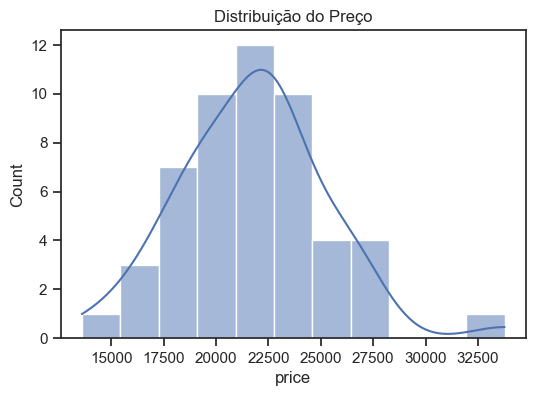

In [107]:
# Verificando a distribuição da variável alvo (valor dos carros)

plt.figure(figsize=(6,4))
sns.histplot(df['price'],kde=True)
plt.title('Distribuição do Preço')
plt.show()


In [108]:
df.columns

Index(['id', 'brand', 'model', 'year', 'miles', 'city_mileage',
       'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre',
       'fuel_capacity', 'num_cylinder', 'num_owners', 'price', 'wheel_drive',
       'engine_type', 'speed_levels', 'front_headroom', 'front_legroom',
       'rear_headroom', 'rear_legroom', 'service_records'],
      dtype='object')

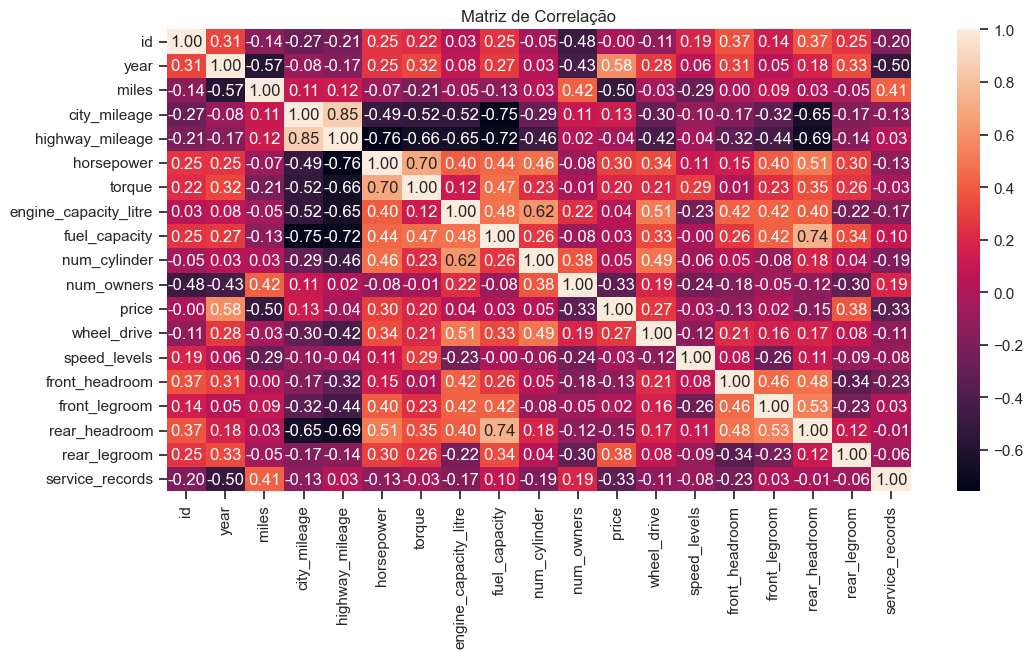

In [109]:
# Verificando a correlação entre as variáveis numéricas

plt.figure(figsize=(12,6))
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64'] )

correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True, fmt='.2f' )
plt.title('Matriz de Correlação')
plt.show()

<Figure size 1600x800 with 0 Axes>

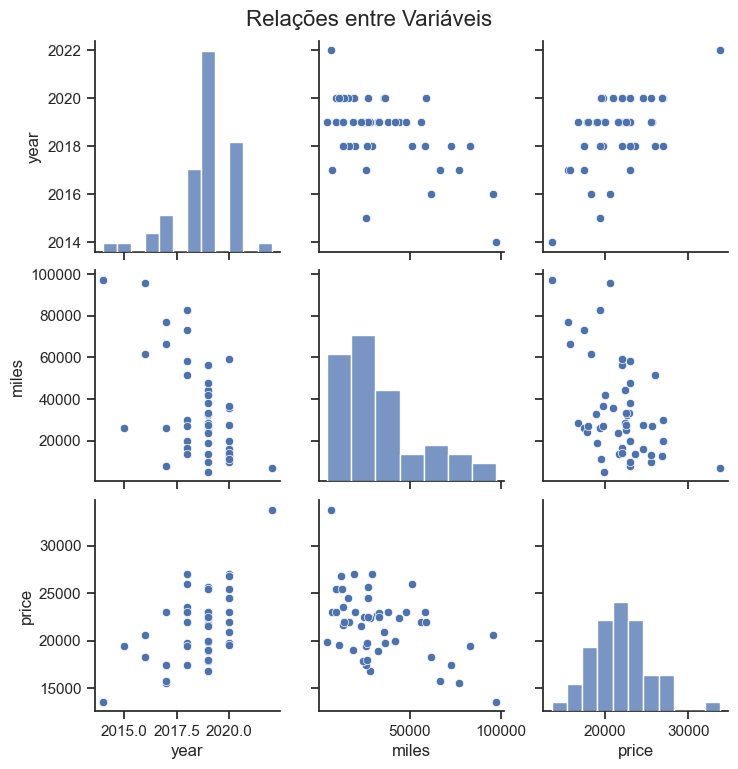

In [110]:
# Explorando relações entre variáveis
plt.figure(figsize=(16, 8))
sns.set_theme(style="ticks")
# Criar o pairplot
pairplot = sns.pairplot(df[['year', 'miles', 'price']])
# Ajustar o espaçamento entre o título e o pairplot
pairplot.fig.suptitle('Relações entre Variáveis', y=1.02, fontsize=16)
# Exibir o gráfico
plt.show()

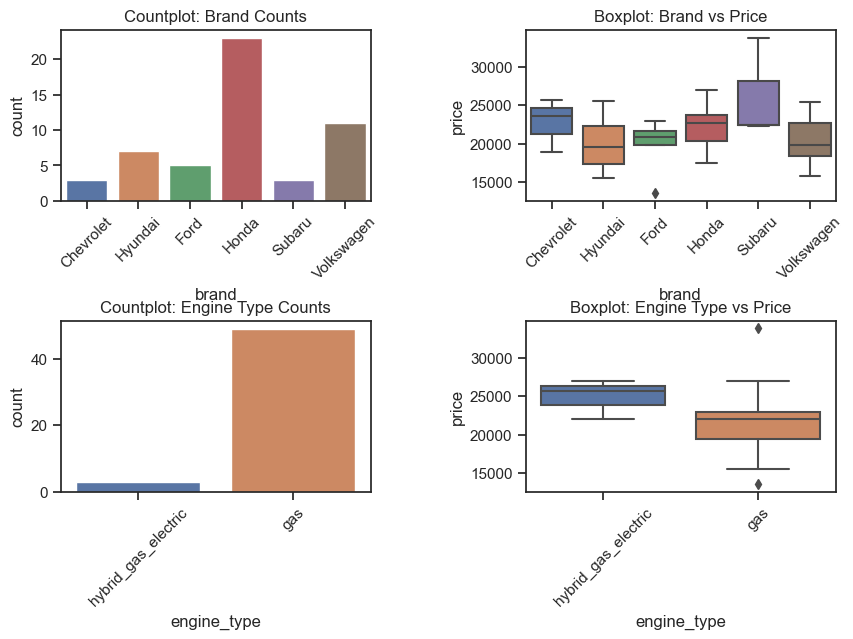

In [218]:
# Cria uma figura com duas linhas e duas colunas
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Ajusta o espaçamento horizontal e vertical entre os subplots
plt.subplots_adjust(wspace=0.5, hspace=0.7)

# Subplot 1: countplot para 'brand'
sns.countplot(x='brand', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Countplot: Brand Counts')
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Boxplot para 'brand' vs 'price'
sns.boxplot(x='brand', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot: Brand vs Price')
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: countplot para 'engine_type' vs 'price'
sns.countplot(x='engine_type', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Countplot: Engine Type Counts')
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Boxplot para 'engine_type' vs 'price'
sns.boxplot(x='engine_type', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot: Engine Type vs Price')
axes[1, 1].tick_params(axis='x', rotation=45)

# Exibe a figura
plt.show()


### 2.1 Hipóteses:

In [ ]:
#Hipóteses :

#1.0 Quanto mais milhas percorridas menor o preço do carro
#2.0  Quanto mais novo maior é o preço
#3.0 Quanto mais potente o carro é , maior é o preço
#4.0 O modelo do veículo influencia no preço do carro
#5.0 Quanto maior o registro de manutenções menor é o preço do carro 
#6.0 Quanto maior o numero de proprietarios menor é o preço do carro 
#7.0 Quanto maior a potência do veículo maior é o consumo na cidade
#8.0 Veículos com tração traseira e tração nas 4 rodas são mais caros do que os demais.
#9.0 Veículos a Diesel são mais caros que os outros.

#### HIPÓTESE 1.0 Quanto mais milhas percorridas menor o preço do carro :
#### VERDADEIRA, conforme  os gráficos de tendência e disperção abaixo, os veículos com mais milhas rodadas tem o preço menor que os veículos com poucas milhas rodadas e o gráfico de correlação negativo confirma a hipótese.


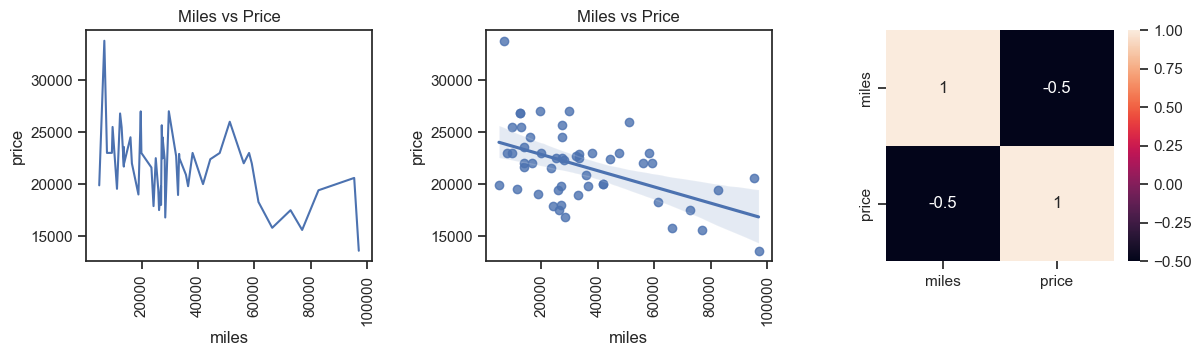

In [214]:
#HIPÓTESE 1.0 Quanto mais milhas percorridas menor o preço do carro
# VERDADEIRA, conforme gráfica abaixo, os veículos com mais milhas rodadas tem o preço menor que os veículos com poucas milhas rodadas.

aux1 = df[['miles','price']]

fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.4)
#fig.delaxes(axes[1, 0])

# Plot on the first subplot (axes[0, 0])
sns.lineplot(x='miles', y='price', data=df, ax=axes[0])
axes[0].set_title('Miles vs Price')
axes[0].tick_params(axis='x', rotation=90)

sns.regplot(x='miles', y='price', data=df, ax=axes[1])
axes[1].set_title('Miles vs Price')
axes[1].tick_params(axis='x', rotation=90)

sns.heatmap( aux1.corr( method='pearson' ), annot=True )


plt.show()


#### HIPÓTESE 2.0 Quanto mais novo maior é o preço :
#### VERDADEIRA, conforme gráfico abaixo, veículos mais novos tem o preço maior que ###veículos mais antigos e o gráfico de correlação positivo confirma a hipótese.

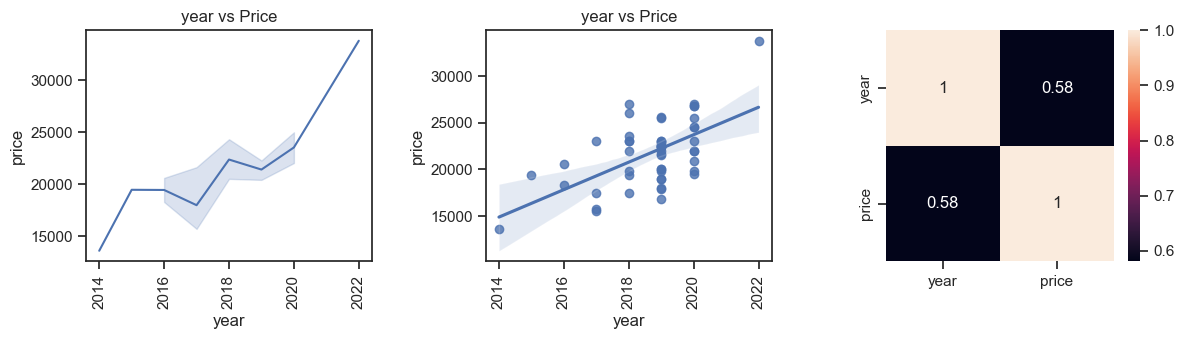

In [207]:
#2.0  Quanto mais novo maior é o preço

aux2 = df[['year','price']]

fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.4,hspace=0.5)
#fig.delaxes(axes[1, 0])

# Plot on the first subplot (axes[0, 0])
sns.lineplot(x='year', y='price', data=df, ax=axes[0])
axes[0].set_title('year vs Price')
axes[0].tick_params(axis='x', rotation=90)

sns.regplot(x='year', y='price', data=df, ax=axes[1])
axes[1].set_title('year vs Price')
axes[1].tick_params(axis='x', rotation=90)

sns.heatmap( aux2.corr( method='pearson' ), annot=True )


plt.show()


#### HIPÓTESE 3.0 Quanto mais potente o carro é , maior é o preço:
#### VERDADEIRA, conforme gráfico abaixo, veículos mais potentes tem o preço maior que ###veículos menos potentes e o gráfico de correlação positivo confirma a hipótese.

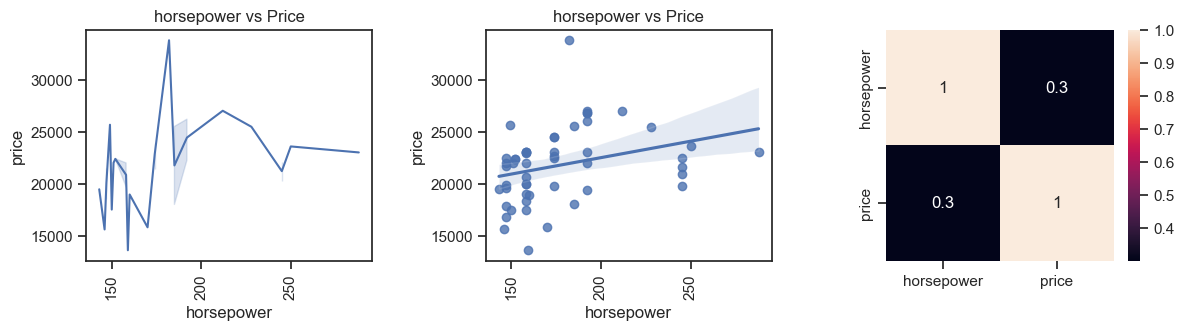

In [208]:
#3.0 Quanto mais potente o carro é , maior é o preço

aux3 = df[['horsepower','price']]

fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.4,hspace=0.5)
#fig.delaxes(axes[1, 0])

# Plot on the first subplot (axes[0, 0])
sns.lineplot(x='horsepower', y='price', data=df, ax=axes[0])
axes[0].set_title('horsepower vs Price')
axes[0].tick_params(axis='x', rotation=90)

sns.regplot(x='horsepower', y='price', data=df, ax=axes[1])
axes[1].set_title('horsepower vs Price')
axes[1].tick_params(axis='x', rotation=90)

sns.heatmap( aux3.corr( method='pearson' ), annot=True )


plt.show()



#### HIPÓTESE 4.0 A marca do veículo influencia no preço do carro

#### VERDADEIRA, Apesar de verdadeira , as marcas ( Cherolet, Subaru e Honda ) tem um preço médio um pouco maior, não há diferença relevante

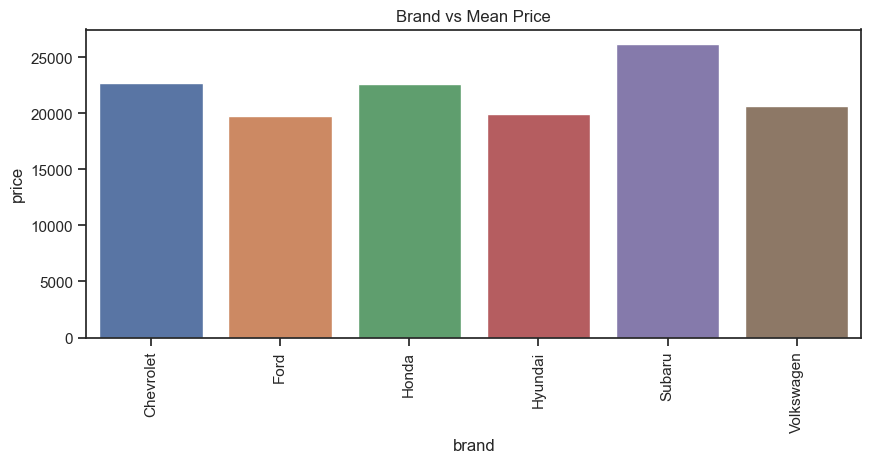

In [212]:
#4.0 A marca do veículo influencia no preço do carro

plt.figure(figsize=(10,4))
aux4 = df[['brand', 'price']].groupby('brand').mean().reset_index()

# Use sns.lineplot com hue para criar uma linha para cada marca
sns.barplot(x='brand', y='price', data=aux4)

# Ajusta a rotação dos rótulos no eixo x
plt.xticks(rotation=90)

# Adiciona um título ao gráfico
plt.title('Brand vs Mean Price')

# Mostra o gráfico
plt.show()


#### HIPÓTESE 5.0 Quanto maior o registro de manutenções menor é o preço do carro :
#### VERDADEIRA

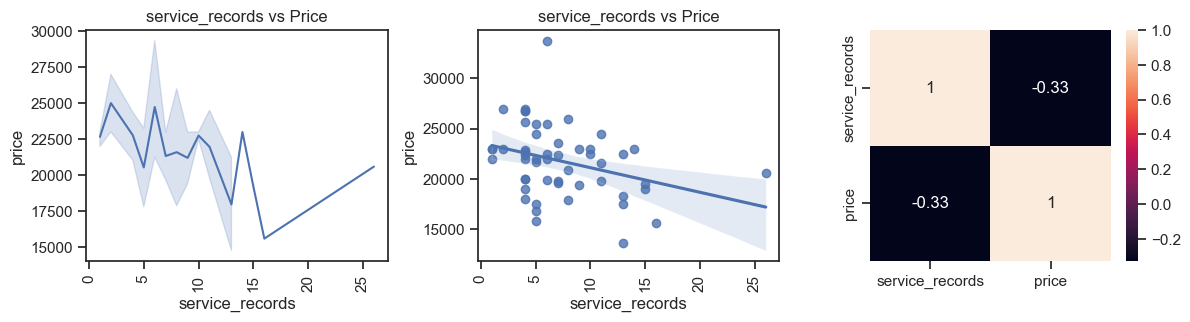

In [215]:
#5.0 Quanto maior o registro de manutenções menor é o preço do carro 


aux5 = df[['service_records','price']]

fig, axes = plt.subplots(1, 3, figsize=(14,3))
plt.subplots_adjust(wspace=0.3,hspace=0.5)
#fig.delaxes(axes[1, 0])

# Plot on the first subplot (axes[0, 0])
sns.lineplot(x='service_records', y='price', data=df, ax=axes[0])
axes[0].set_title('service_records vs Price')
axes[0].tick_params(axis='x', rotation=90)

sns.regplot(x='service_records', y='price', data=df, ax=axes[1])
axes[1].set_title('service_records vs Price')
axes[1].tick_params(axis='x', rotation=90)

sns.heatmap( aux5.corr( method='pearson' ), annot=True )


plt.show()


#### HIPÓTESE 6.0 Quanto maior o numero de proprietarios menor é o preço do carro
#### VERDADEIRA

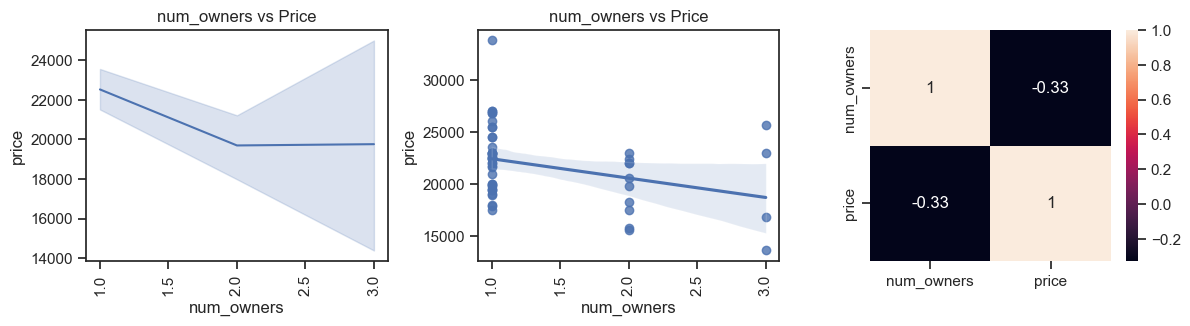

In [220]:

aux6 = df[['num_owners','price']]

fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.3,hspace=0.5)
#fig.delaxes(axes[1, 0])

# Plot on the first subplot (axes[0, 0])
sns.lineplot(x='num_owners', y='price', data=df, ax=axes[0])
axes[0].set_title('num_owners vs Price')
axes[0].tick_params(axis='x', rotation=90)

sns.regplot(x='num_owners', y='price', data=df, ax=axes[1])
axes[1].set_title('num_owners vs Price')
axes[1].tick_params(axis='x', rotation=90)

sns.heatmap( aux6.corr( method='pearson' ), annot=True )


plt.show()

#### HIPÓTESE 7.0 Quanto maior a potência do veículo maior é o consumo na cidade
#### FALSA - VEÍCULOS DE POTENCIA MAIOR CONSOMEM MENOS COMBUSTÍVEL

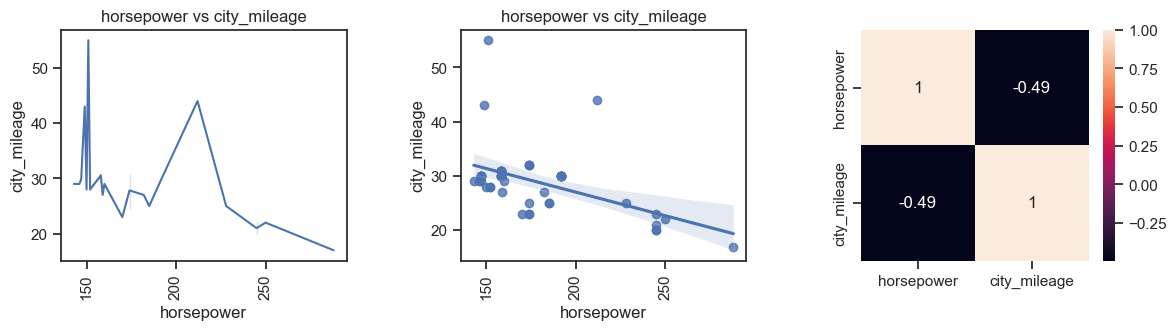

In [221]:
#7.0 Quanto maior a potência do veículo maior é o consumo na cidade


aux7 = df[['horsepower','city_mileage']]

fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.4,hspace=0.5)
#fig.delaxes(axes[1, 0])

# Plot on the first subplot (axes[0, 0])
sns.lineplot(x='horsepower', y='city_mileage', data=df, ax=axes[0])
axes[0].set_title('horsepower vs city_mileage')
axes[0].tick_params(axis='x', rotation=90)

sns.regplot(x='horsepower', y='city_mileage', data=df, ax=axes[1])
axes[1].set_title('horsepower vs city_mileage')
axes[1].tick_params(axis='x', rotation=90)

sns.heatmap( aux7.corr( method='pearson' ), annot=True )


plt.show()

#### HIPÓTESE 8.0 Veículos com tração traseira e tração nas 4 rodas são mais caros do que os demais.
#### VERDADEIRA, veículos com tração nas 4 rodas são mais caros.

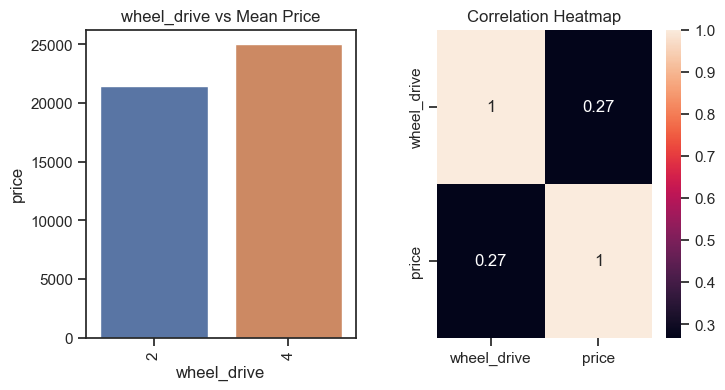

In [184]:
#8.0 Veículos com tração traseira e tração nas 4 rodas são mais caros do que os demais.
aux8 = df[['wheel_drive', 'price']].groupby('wheel_drive').mean().reset_index()
aux9 = df[['wheel_drive', 'price']]


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Use sns.barplot para criar um gráfico de barras
sns.barplot(x='wheel_drive', y='price', data=aux8, ax=axes[0])
# Ajusta a rotação dos rótulos no eixo x
axes[0].tick_params(axis='x', rotation=90)
# Adiciona um título ao gráfico
axes[0].set_title('wheel_drive vs Mean Price')

# Use sns.heatmap para criar um gráfico de mapa de calor
sns.heatmap(aux9.corr(method='pearson'), annot=True, ax=axes[1])
# Adiciona um título ao gráfico de mapa de calor
axes[1].set_title('Correlation Heatmap')

# Mostra o gráfico
plt.show()


In [ ]:
#9.0 Veículos a Diesel são mais caros que os outros.

## 3.0 Feature Engineering

## 4.0 Machine Learning Model